In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')

# convert from pandas data frame to tensor
data = torch.tensor(iris[iris.columns[0:-1]].values).float()

# transform species to numbers 
labels = torch.zeros(len(data), dtype = torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [6]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, train_size=0.8)

# then convert them into Pytorch Datasets
train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

# finally translate into dataloader objects
train_loader = DataLoader(train_data, shuffle = True, batch_size=12)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [24]:
for i in test_loader:
    print(i)

[tensor([[5.7000, 3.8000, 1.7000, 0.3000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.4000, 3.2000, 4.5000, 

In [11]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(64,3),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [20]:
# train the model

# global parameter
numepochs = 500

def trainTheModel():

    # inititalize losses
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):
        batchAcc = []
        # loop over training batches
        for X, y in train_loader:
            yHat = ANNiris(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy
            batchAcc.append(100*torch.mean((torch.argmax(yHat, axis = 1) == y).float()).item())
        
        trainAcc.append(np.mean(batchAcc))
    
        X,y = next(iter(test_loader))
        predlabels = torch.argmax(ANNiris(X), axis = 1)
        testAcc.append(100*torch.mean((predlabels == y).float()).item())
            

        
        
    return trainAcc, testAcc



In [21]:
ANNiris, lossfun, optimizer = createANewModel()

trainAcc, testAcc = trainTheModel()

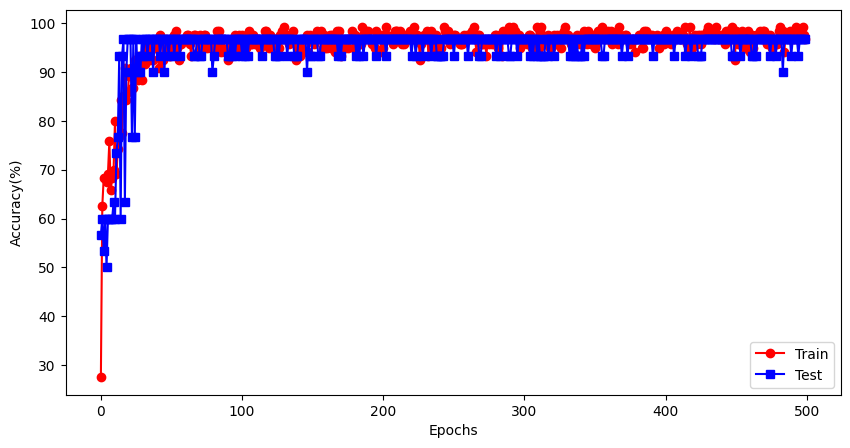

In [22]:
fig = plt.figure(figsize = (10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.show()